In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
data=pd.read_excel("RawDAta-PMOPDs.xlsx",engine='openpyxl')
data.shape

(141, 25)

In [3]:
data.head()

,Donor,Acceptor,Active area(cm^2),Bias(V),Dark current (nA/cm^2),SR_peak λ(nm),SR (A/W),EQE_peak λ(nm),EQE(%),D/A mass ratio,...,Donor_HOMO(ev),Donor_LUMO(ev),Donor_bandgap(ev),Acceptor_HOMO(ev),Acceptor_LUMO(ev),Acceptor_bandgap(ev),ETL,HTL,Electrode,Reference
0,P3HT,PC70BM,0.038,1.0,200.0,640,1.058065,640,205.0,0.05,...,5.2,3.2,2.0,6.0,4.0,2.0,ZnO,NaN,Au,https://doi.org/10.1039/C9NR09926C
1,P3HT,PC70BM,0.038,3.0,3000.0,640,5.254194,640,1018.0,0.05,...,5.2,3.2,2.0,6.0,4.0,2.0,ZnO,NaN,Au,https://doi.org/10.1039/C9NR09926C
2,P3HT,PC70BM,0.038,4.0,8000.0,640,8.877419,640,1720.0,0.05,...,5.2,3.2,2.0,6.0,4.0,2.0,ZnO,NaN,Au,https://doi.org/10.1039/C9NR09926C
3,P3HT,PC70BM,0.038,5.0,20000.0,640,13.832258,640,2680.0,0.05,...,5.2,3.2,2.0,6.0,4.0,2.0,ZnO,NaN,Au,https://doi.org/10.1039/C9NR09926C
4,P3HT,PC70BM,0.038,-1.0,70.0,640,1.161290,640,225.0,0.05,...,5.2,3.2,2.0,6.0,4.0,2.0,ZnO,NaN,Au,https://doi.org/10.1039/C9NR09926C


In [4]:
data.describe()

,Active area(cm^2),Bias(V),Dark current (nA/cm^2),SR_peak λ(nm),SR (A/W),EQE_peak λ(nm),EQE(%),D/A mass ratio,D*(10^10 Jones Shot noise ),LDR (dB Shot+Thermal noise),Unnamed: 14,Donor_HOMO(ev),Donor_LUMO(ev),Donor_bandgap(ev),Acceptor_HOMO(ev),Acceptor_LUMO(ev),Acceptor_bandgap(ev)
count,141.000000,141.000000,5.100000e+01,141.000000,141.000000,141.000000,141.000000,141.000000,64.000000,7.000000,0.0,141.00000,141.000000,141.000000,141.000000,141.00000,141.000000
mean,0.222607,-9.429078,6.016004e+06,506.851064,62.957685,506.851064,16632.215358,49.821407,1225.719086,123.000000,NaN,5.23305,3.327021,1.906028,5.689362,3.99227,1.697092
std,0.799961,11.074517,1.919156e+07,137.100064,111.084819,137.100064,28355.214610,41.613526,2471.122369,14.083087,NaN,0.08079,0.236839,0.217951,0.311231,0.18325,0.327542
min,0.030000,-40.000000,7.300000e-01,330.000000,0.380565,330.000000,116.000000,0.005000,1.217214,104.000000,NaN,5.10000,3.100000,1.410000,5.190000,3.51000,1.100000
25%,0.038000,-20.000000,6.500000e+02,375.000000,3.906250,375.000000,1190.000000,14.285714,59.508261,119.000000,NaN,5.20000,3.200000,1.800000,5.440000,3.88000,1.530000
50%,0.038000,-10.000000,3.340000e+03,520.000000,15.314516,520.000000,4500.000000,33.330000,445.479233,120.000000,NaN,5.20000,3.200000,2.000000,5.630000,4.00000,1.630000
75%,0.064400,-0.300000,5.150000e+04,625.000000,66.532258,625.000000,20000.000000,100.000000,788.615894,124.000000,NaN,5.21000,3.410000,2.000000,6.000000,4.14000,2.000000
max,4.000000,20.000000,1.000000e+08,870.000000,665.322581,870.000000,156000.000000,100.000000,14300.000000,151.000000,NaN,5.50000,3.900000,2.400000,6.400000,4.30000,2.400000


## ML Models - Data Preprocessing

In [5]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor

In [6]:
#prepressing data for training: donors
x_data1 =np.array(data.loc[:,'SMILES(donor)'])
smile_d=[]
for i in x_data1:
    mole=Chem.MolFromSmiles(i)
    smile_d.append(mole)

#prepressing data for training: acceptors
x_data2=np.array(data.loc[:,'SMILES(acceptor)'])
smile_a=[]
for i in x_data2:
    mole=Chem.MolFromSmiles(i)
    smile_a.append(mole)
    
print(len(smile_d), len(smile_a))

141 141


141


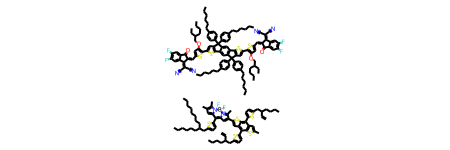

In [7]:
#combine SMILES of donor and acceptor range
merge_smile=[]
for i in range(data.shape[0]):
    combo = Chem.CombineMols(smile_d[i],smile_a[i])
    mmm=Chem.MolToSmiles(combo)
    mole_merge=Chem.MolFromSmiles(mmm)
    merge_smile.append(mole_merge)

print(len(merge_smile))
merge_smile[90]

In [8]:
#Bias feature for x input
Bias = np.array(data.loc[:,'Bias(V)'])
print(Bias.shape)

(141,)


In [9]:
#change shape of ydata for testing
y_data=np.around(np.array(data.loc[:,'EQE(%)']),decimals=1)
print(y_data.shape, y_data[:5])

(141,) [ 205. 1018. 1720. 2680.  225.]


In [10]:
nBits=512
fpt_Morgan = [AllChem.GetMorganFingerprintAsBitVect(p, 5, nBits=nBits) for p in merge_smile]
morgan= []
for i in fpt_Morgan:
    arr1 = np.zeros((1,))  # create a num array to accept the data
    DataStructs.ConvertToNumpyArray(i, arr1)
    morgan.append(arr1)    # this will change numpy array to list 
    
x_data_Morgan = np.array(morgan) # change list to np array
x_data_Bias = np.concatenate([x_data_Morgan, Bias[:,None]], axis=1)

print(x_data_Morgan.shape, x_data_Bias.shape)
print(x_data_Bias[:5, :])

(141, 512) (141, 513)
[[ 0.  0.  1. ...  0.  0.  1.]
 [ 0.  0.  1. ...  0.  0.  3.]
 [ 0.  0.  1. ...  0.  0.  4.]
 [ 0.  0.  1. ...  0.  0.  5.]
 [ 0.  0.  1. ...  0.  0. -1.]]


## ML Model - Preprocessing

In [11]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MaxAbsScaler
from sklearn import metrics

In [12]:
# standardized data
mas = MaxAbsScaler().fit(x_data_Bias[:,512:])

scaler_x_mas_Bias = mas.transform(x_data_Bias[:,512:])
x_data_Bias[:,512:] = scaler_x_mas_Bias[:,:]

print(x_data_Bias.shape)
print(x_data_Bias[:5, :])

(141, 513)
[[ 0.     0.     1.    ...  0.     0.     0.025]
 [ 0.     0.     1.    ...  0.     0.     0.075]
 [ 0.     0.     1.    ...  0.     0.     0.1  ]
 [ 0.     0.     1.    ...  0.     0.     0.125]
 [ 0.     0.     1.    ...  0.     0.    -0.025]]


## ML Model - Modelling

In [13]:
#create KFold validation 
k = 10
kf=KFold(n_splits=k, shuffle=True, random_state=9)

# with Bias
SVR_cross_Corrcoef = []
SVR_cross_RSE = []
SVR_cross_RMSE = []
SVR_R2 = []
SVR_MAPE = []

for train_index, test_index in kf.split(x_data_Bias):
    x_train, x_test = x_data_Bias[train_index], x_data_Bias[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    
    model_svm_cross = SVR(C=120000, gamma=5)
    model_svm_cross.fit(x_train, y_train)
    test_svm_cross = model_svm_cross.predict(x_test)
    
    SVR_cross_Corrcoef.append(np.corrcoef(y_test, test_svm_cross)[0,1])
    SVR_cross_RSE.append(mean_squared_error(y_test, test_svm_cross))
    SVR_cross_RMSE.append(np.sqrt(mean_squared_error(y_test, test_svm_cross)))
    SVR_R2.append(r2_score(y_test, test_svm_cross))
    SVR_MAPE.append(mean_absolute_percentage_error(y_test, test_svm_cross))
    
print('Cross-Predicted Correlated Coef: ', SVR_cross_Corrcoef, np.mean(SVR_cross_Corrcoef), np.std(SVR_cross_Corrcoef))
print('Cross-Predicted mean_squared_error: ', SVR_cross_RSE, np.mean(SVR_cross_RSE), np.std(SVR_cross_RSE))
print('Cross-Predicted root_mean_squared_error: ', SVR_cross_RMSE, np.mean(SVR_cross_RMSE), np.std(SVR_cross_RMSE))
print('Cross-Predicted R^2_score:', SVR_R2, np.mean(SVR_R2), np.std(SVR_R2))
print('Cross-Predicted MAPE:', SVR_MAPE, np.mean(SVR_MAPE), np.std(SVR_MAPE))

Cross-Predicted Correlated Coef:  [0.886032267814152, 0.9344323659951589, 0.9468579814749856, 0.9733035280880802, 0.9977710329833704, 0.9527627409995483, 0.9708657275422983, 0.9819267280991364, 0.9920997167640286, 0.9874896316269717] 0.962354172138773 0.03206735179770869
Cross-Predicted mean_squared_error:  [178237545.71224472, 37421459.420936115, 114295899.84688325, 103242913.63326988, 51139047.73182567, 101027108.50277396, 93840298.44250205, 22330050.472723752, 40800877.74300532, 34817547.39808435] 77715274.8904249 46366243.759580925
Cross-Predicted root_mean_squared_error:  [13350.563497929394, 6117.308184237256, 10690.92605188546, 10160.852013156666, 7151.157090417303, 10051.224229056575, 9687.120234749957, 4725.4682807869685, 6387.556476697902, 5900.6395753413335] 8422.281563425884 2603.929368627612
Cross-Predicted R^2_score: [0.7692066748463355, 0.863876856949147, 0.8367238549234076, 0.883578943447568, 0.9163642374883937, 0.889993610227336, 0.724437779934171, 0.9380418587985169, 

In [14]:
RF_cross_Corrcoef = []
RF_cross_RSE = []
RF_cross_RMSE = []
RF_R2 = []
RF_MAPE = []

for train_index, test_index in kf.split(x_data_Bias):
    x_train, x_test = x_data_Bias[train_index], x_data_Bias[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    
    model_rf_cross = RandomForestRegressor(n_estimators=250, random_state=9)
    model_rf_cross.fit(x_train, y_train)
    test_rf_cross = model_rf_cross.predict(x_test)
    
    RF_cross_Corrcoef.append(np.corrcoef(y_test, test_rf_cross)[0,1])
    RF_cross_RSE.append(mean_squared_error(y_test, test_rf_cross))
    RF_cross_RMSE.append(np.sqrt(mean_squared_error(y_test, test_rf_cross)))
    RF_R2.append(r2_score(y_test, test_rf_cross))
    RF_MAPE.append(mean_absolute_percentage_error(y_test, test_rf_cross))
    
print('Cross-Predicted Correlated Coef: ', RF_cross_Corrcoef, np.mean(RF_cross_Corrcoef), np.std(RF_cross_Corrcoef))
print('Cross-Predicted mean_squared_error: ', RF_cross_RSE, np.mean(RF_cross_RSE),np.std(RF_cross_RSE))
print('Cross-Predicted root_mean_squared_error: ', RF_cross_RMSE, np.mean(RF_cross_RMSE), np.std(RF_cross_RMSE))
print ('Cross-Predicted R^2_score:', RF_R2, np.mean(RF_R2),np.std(RF_R2))
print('Cross-Predicted MAPE:', RF_MAPE, np.mean(RF_MAPE), np.std(RF_MAPE))

Cross-Predicted Correlated Coef:  [0.839231508008815, 0.8616951834370663, 0.9047007582821504, 0.98033869379729, 0.9615849051971381, 0.9500408466097947, 0.9403191659085581, 0.9691812422792597, 0.9505048810705332, 0.9551113029648844] 0.9312708487555488 0.04489351473010928
Cross-Predicted mean_squared_error:  [247588823.73273003, 75311232.92332481, 159793066.00320035, 37328270.356071785, 74771384.29272208, 115771179.68035153, 131719644.1220438, 60445735.237298846, 222317306.65151832, 125451127.52549097] 125049777.05247526 65333920.353349
Cross-Predicted root_mean_squared_error:  [15734.955472855016, 8678.2044757729, 12640.928209716261, 6109.68660047893, 8647.044830040033, 10759.701653872728, 11476.91788425986, 7774.685539447808, 14910.30873763244, 11200.496753514595] 10793.293015759056 2924.8252816949607
Cross-Predicted R^2_score: [0.6794062234653195, 0.7260501890842235, 0.771729380827098, 0.9579070706047154, 0.877714544624218, 0.8739390871905615, 0.6132050071985735, 0.8322840602875174, 0

In [15]:
import catboost
from catboost import CatBoostRegressor

# Catboost parameters
Cat_cross_Corrcoef = []
Cat_cross_RSE = []
Cat_cross_RMSE = []
Cat_R2 = []
Cat_MAPE = []

for train_index, test_index in kf.split(x_data_Bias):
    x_train, x_test = x_data_Bias[train_index], x_data_Bias[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    
    model_Cat_cross = CatBoostRegressor(iterations=500, learning_rate=0.1)
    model_Cat_cross.fit(x_train, y_train, verbose=False, plot=False)
    test_Cat_cross = model_Cat_cross.predict(x_test)
    
    Cat_cross_Corrcoef.append(np.corrcoef(y_test, test_Cat_cross)[0,1])
    Cat_cross_RSE.append(mean_squared_error(y_test, test_Cat_cross))
    Cat_cross_RMSE.append(np.sqrt(mean_squared_error(y_test, test_Cat_cross)))
    Cat_R2.append(r2_score(y_test, test_Cat_cross))
    Cat_MAPE.append(mean_absolute_percentage_error(y_test, test_Cat_cross))
    
print('Cross-Predicted Correlated Coef: ', Cat_cross_Corrcoef, np.mean(Cat_cross_Corrcoef), np.std(Cat_cross_Corrcoef))
print('Cross-Predicted mean_squared_error: ', Cat_cross_RSE, np.mean(Cat_cross_RSE), np.std(Cat_cross_RSE))
print('Cross-Predicted root_mean_squared_error: ', Cat_cross_RMSE, np.mean(Cat_cross_RMSE), np.std(Cat_cross_RMSE))
print ('Cross-Predicted R^2_score:', Cat_R2, np.mean(Cat_R2), np.std(Cat_R2))
print('Cross-Predicted MAPE:', Cat_MAPE, np.mean(Cat_MAPE), np.std(Cat_MAPE))

Cross-Predicted Correlated Coef:  [0.8443307328864469, 0.8893288543575464, 0.9059387732038124, 0.9756412227415947, 0.9897558239260057, 0.9486626260537729, 0.9707025912724687, 0.9571168135439436, 0.9673773021430638, 0.9681694393369626] 0.9417024179465618 0.04410329561169967
Cross-Predicted mean_squared_error:  [253358243.11747688, 59487709.231043525, 133421825.6971676, 98936638.06888974, 24425098.039457154, 108353833.93460242, 95285933.26291527, 51667691.422817394, 128516380.9756396, 100092392.31197138] 105354574.6061981 59113628.09070679
Cross-Predicted root_mean_squared_error:  [15917.231012882765, 7712.827576903526, 11550.836579969764, 9946.689804597796, 4942.175435924665, 10409.314767774218, 9761.451391207931, 7188.02416682202, 11336.50655959055, 10004.618549048802] 9876.967584472204 2792.8633947050494
Cross-Predicted R^2_score: [0.6719356118234749, 0.7836093493217822, 0.8094017248379133, 0.8884348810937281, 0.9600537790679387, 0.8820156860290117, 0.7201926704542432, 0.8566400857606

In [16]:
ANN_cross_Corrcoef = []
ANN_cross_RSE = []
ANN_cross_RMSE = []
ANN_R2 = []
ANN_MAPE = []

for train_index, test_index in kf.split(x_data_Bias):
    x_train, x_test = x_data_Bias[train_index], x_data_Bias[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    
    model_ann_cross = MLPRegressor(hidden_layer_sizes=(100,50,20), activation="relu",
                 solver='adam', alpha=0.05,
                 batch_size='auto', learning_rate="adaptive",
                 learning_rate_init=0.001,
                 power_t=0.5, max_iter=50000,random_state=9, tol=1e-4)
    model_ann_cross.fit(x_train, y_train)
    test_ann_cross = model_ann_cross.predict(x_test)
    
    ANN_cross_Corrcoef.append(np.corrcoef(y_test, test_ann_cross)[0,1])
    ANN_cross_RSE.append(mean_squared_error(y_test, test_ann_cross))
    ANN_cross_RMSE.append(np.sqrt(mean_squared_error(y_test, test_ann_cross)))
    ANN_R2.append(r2_score(y_test, test_ann_cross))
    ANN_MAPE.append(mean_absolute_percentage_error(y_test, test_ann_cross))
    
print('Cross-Predicted Correlated Coef: ', ANN_cross_Corrcoef, np.mean(ANN_cross_Corrcoef), np.std(ANN_cross_Corrcoef))
print('Cross-Predicted mean_squared_error: ', ANN_cross_RSE, np.mean(ANN_cross_RSE), np.std(ANN_cross_RSE))
print('Cross-Predicted root_mean_squared_error: ', ANN_cross_RMSE, np.mean(ANN_cross_RMSE), np.std(ANN_cross_RMSE))
print ('Cross-Predicted R^2_score:', ANN_R2, np.mean(ANN_R2), np.std(ANN_R2))
print('Cross-Predicted MAPE:', ANN_MAPE, np.mean(ANN_MAPE), np.std(ANN_MAPE))

Cross-Predicted Correlated Coef:  [0.9122155900671927, 0.8540435876804077, 0.9464992266511459, 0.9761657455409578, 0.9805813274309629, 0.9161315408976906, 0.9789410185973254, 0.9444152440114973, 0.9805365520454115, 0.9609241285650391] 0.9450453961487633 0.03884532806114446
Cross-Predicted mean_squared_error:  [147502951.71168467, 85729757.63011186, 99009251.61975603, 100271873.68720785, 37088932.971016064, 161680662.41122156, 99584272.0870254, 54644969.892114855, 69764344.62979396, 151907142.0410795] 100718415.86810118 39854948.035611846
Cross-Predicted root_mean_squared_error:  [12145.07932093013, 9259.036538977036, 9950.339271590494, 10013.584457486133, 6090.068388040981, 12715.371107884408, 9979.191955615715, 7392.22360945033, 8352.505290617537, 12325.061543095007] 9822.246148368778 2059.586480086694
Cross-Predicted R^2_score: [0.8090037844749036, 0.6881520859373594, 0.8585614273736089, 0.8869292131891666, 0.9393426094666538, 0.8239491733308096, 0.7075705900833812, 0.848379171168372